BOOK RENTAL RECOMMENDATION

DESCRIPTION
BookRent is the largest online and offline book rental chain in India. The company charges a fixed rental fee for a book per month. Lately, the company has been losing its user base.
The main reason for this is that users are not able to choose the right books for themselves. The company wants to solve this problem and increase its revenue and profit.

OBJECTIVE: 
You, as an ML expert, have to model a recommendation engine so that users get recommendations for books based on the behavior of similar users. 
This will ensure that users are renting books based on their individual tastes.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [9]:
#Loading data into dataframes

books=pd.read_csv(r"BX-Books.csv",sep=',',encoding='latin-1')
ratings=pd.read_csv('BX-Book-Ratings.csv',sep=',',encoding='latin-1')
users=pd.read_csv('BX-Users.csv',sep=',',encoding='latin-1')

In [13]:
print("shape of books dataframe",books.shape)
print("shape of Ratings dataframe",ratings.shape)
print("shape of Users dataframe",users.shape)

shape of books dataframe (271379, 5)
shape of Ratings dataframe (1048575, 3)
shape of Users dataframe (278859, 3)


In [19]:
books.dtypes

isbn                   object
book_title             object
book_author            object
year_of_publication    object
publisher              object
dtype: object

In [20]:
ratings.dtypes

user_id     int64
isbn       object
rating      int64
dtype: object

In [21]:
users.dtypes

user_id      object
Location     object
Age         float64
dtype: object

In [15]:
#Exploring the books dataset
books.describe()

,isbn,book_title,book_author,year_of_publication,publisher
count,271379,271379,271378,271379,271377
unique,271379,242150,102042,202,16823
top,671894269,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,17145,7535


In [17]:
ratings.describe()

,user_id,rating
count,1.048575e+06,1.048575e+06
mean,1.285089e+05,2.879907e+00
std,7.421876e+04,3.857870e+00
min,2.000000e+00,0.000000e+00
25%,6.339400e+04,0.000000e+00
50%,1.288350e+05,0.000000e+00
75%,1.927790e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [18]:
users.describe()

,Age
count,168096.000000
mean,34.751434
std,14.428097
min,0.000000
25%,24.000000
50%,32.000000
75%,44.000000
max,244.000000


### Handling Missing values

In [22]:
books.isna().sum()

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
dtype: int64

In [23]:
ratings.isna().sum()

user_id    0
isbn       0
rating     0
dtype: int64

In [147]:
users.isna().sum()  # There are some missing values in Age column

user_id          0
Location         1
Age         110763
dtype: int64

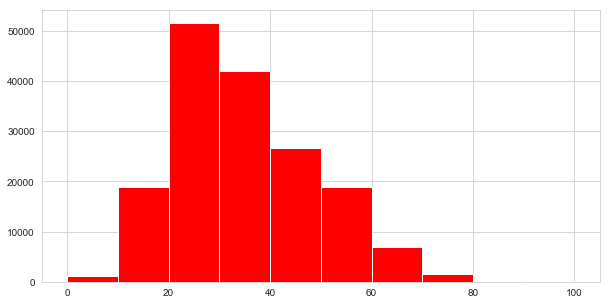

In [39]:
# USER_AGE DISTRIBUTION
plt.figure(figsize=(10,5))
plt.hist(users['Age'],bins=[0,10,20,30,40,50,60,70,80,90,100],color='r')
plt.xlabel='User Age'
plt.ylabel="Counts"
#plt.legend()
plt.show()

In [42]:
users['Age'].mean(),users['Age'].median(),users['Age'].mode([0]) # mean>median , so left skewed

(34.75143370454978, 32.0, 0    24.0
 dtype: float64)

### Read the data where ratings are given by users

In [52]:
ratings.head(5)

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


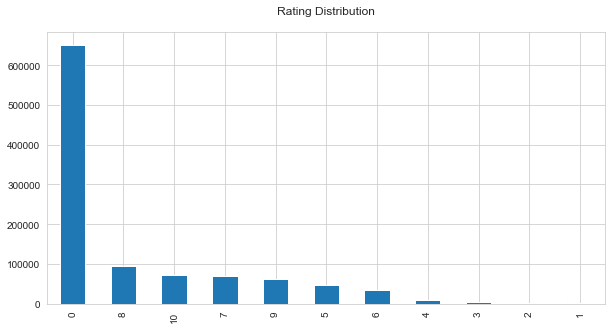

In [73]:
plt.figure(figsize=(10,5))
ratings['rating'].value_counts().plot.bar()
plt.title('Rating Distribution\n')
#plt.xlabel('Rating')
#plt.ylabel('rating_count')
plt.show()

### Recommendation based on the most rated books

In [155]:
# find the books with most ratings
rating_count=pd.DataFrame(ratings.groupby('isbn')['rating'].agg(np.size))
rating_count.columns=['rating']
rating_count.head()

,rating
isbn,
904492401X,1
#069580216X,1
#6612432,1
(THEWINDMILLP,1
)416195113,1


In [156]:
rating_count.sort_values(by='rating',ascending=False,inplace=True)
rating_count.head(5).index # The 5 most rated books

Index(['971880107', '316666343', '385504209', '312195516', '60928336'], dtype='object', name='isbn')

In [157]:
rating_count.head(5)

,rating
isbn,
971880107,2264
316666343,1164
385504209,813
312195516,668
60928336,662


In [105]:
most_rated_books= pd.DataFrame(['971880107', '316666343', '385504209', '312195516', '60928336'],index=np.arange(5),columns=['isbn'])
most_rated_books=pd.merge(most_rated_books,books,on='isbn')
most_rated_books

,isbn,book_title,book_author,year_of_publication,publisher
0,971880107,Wild Animus,Rich Shapero,2004,Too Far
1,316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
2,385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
3,312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
4,60928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial


### Recommendation based on the highest mean ratings a book received

In [160]:
average_rating=pd.DataFrame(ratings.groupby('isbn')['rating'].agg(np.mean))
average_rating.head(2)

,rating
isbn,
904492401X,0.0
#069580216X,0.0


In [162]:
average_rating.sort_values(by='rating',ascending=False,inplace=True)
average_rating.head(5)

,rating
isbn,
689851022,10.0
312323239,10.0
201357437,10.0
800793218,10.0
800801962,10.0


In [166]:
print("ISBN of the 5 books with highest mean ratings",list(average_rating.head(5).index))

ISBN of the 5 books with highest mean ratings ['689851022', '312323239', '201357437', '800793218', '800801962']


In [171]:
highest_avg_rated_books=pd.DataFrame(['689851022', '312323239', '201357437', '800793218', '800801962'],index=np.arange(5))
highest_avg_rated_books.columns=['isbn']
highest_avg_rated_books=pd.merge(highest_avg_rated_books,books,on='isbn')
highest_avg_rated_books

,isbn,book_title,book_author,year_of_publication,publisher
0,689851022,Boarding-School Blues,Kim Ostrow,2002,Simon Spotlight/Nickelodeon
1,312323239,"Pale as the Dead (Natasha Blake, 1)",Fiona Mountain,2004,St. Martin's Minotaur
2,201357437,Problem Solving With Java,Elliot B. Koffman,1998,Addison-Wesley
3,800793218,Blood Brothers,Elias Chacour,2003,Chosen Books
4,800801962,Anatomy and Life Drawing,"Don, Davy",1978,Parkwest Pubns


### Take a quick look at the number of unique users and books in the entire dataset

In [97]:
books['isbn'].nunique()

271379

In [98]:
users['user_id'].nunique()

278859

In [126]:
#users with less than 200 ratings
count_user=ratings['user_id'].value_counts()
count_user
ratings[ratings['user_id']. isin (count_user[count_user>200])].head(2)

,user_id,isbn,rating
9889,202,140252800,6
9890,204,451452755,0


### Merging rating and books for practical purposes

In [140]:
df=pd.merge(ratings,books, on='isbn')

In [141]:
df.shape

(941148, 7)

In [142]:
df=df.iloc[0:10000,:]

In [143]:
df.shape  # Making a small dataframe for the ease of computation

(10000, 7)

In [144]:
df.head()

,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


In [145]:
df.dtypes

user_id                 int64
isbn                   object
rating                  int64
book_title             object
book_author            object
year_of_publication    object
publisher              object
dtype: object

In [146]:
#unique users and books
n_users = df.user_id.nunique()
n_books = df.isbn.nunique()

print('Num. of Users: '+ str(n_users))
print('Num of Books: '+str(n_books))

Num. of Users: 6292
Num of Books: 336


In [172]:
df.columns

Index(['user_id', 'isbn', 'rating', 'book_title', 'book_author',
       'year_of_publication', 'publisher'],
      dtype='object')

### Creating a user-book matrix

In [192]:
book_matrix= df.pivot_table(index='user_id',
                           columns='book_title',
                           values='rating')

In [193]:
book_matrix.head(4)

book_title,007 El Mundo Nunca Es Suficiente,4000 Vornamen aus aller Welt. Von Alexander bis Zoe.,A Kid's Guide to How to Save the Planet (Camelot world),A Kiss of Shadows (Meredith Gentry Novels (Paperback)),A Painted House,A String in the Harp,A Wrinkle In Time,Adressat unbekannt.,"Advanced Photography, Sixth Edition",Alaska,...,Waiting to Exhale,Walk Two Moons,Was Mir Wichtig War: Letzte Aufzeichnungen Und Gesprache,Wasted : A Memoir of Anorexia and Bulimia,What's That Pig Outdoors: A Memoir of Deafness,Whirlwind (The X-Files),Whispers,Wild Animus,Wilt: Tom Sharpe,Â¡No bajes al sÃ³tano! (EscalofrÃ­os No. 2)
user_id,,,,,,,,,,,,,,,,,,,,,
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


### Recommendation using correlation

In [194]:
# for the book Wild Animus
wild_animus_rating=book_matrix['Wild Animus']

In [195]:
similar_to_wild_animus=book_matrix.corrwith(wild_animus_rating)

In [196]:
similar_to_wild_animus.head()

book_title
007 El Mundo Nunca Es Suficiente                                NaN
4000 Vornamen aus aller Welt. Von Alexander bis Zoe.            NaN
A Kid's Guide to How to Save the Planet (Camelot world)         NaN
A Kiss of Shadows (Meredith Gentry Novels (Paperback))     0.443607
A Painted House                                            0.361505
dtype: float64

In [197]:
corr_wild_animus=pd.DataFrame(similar_to_wild_animus)
corr_wild_animus.columns=['correlation']
corr_wild_animus.dropna(inplace=True)
corr_wild_animus.head(5)

,correlation
book_title,
A Kiss of Shadows (Meredith Gentry Novels (Paperback)),0.443607
A Painted House,0.361505
A Wrinkle In Time,-0.045990
Alaska,-0.150756
Along Came a Spider (Alex Cross Novels),0.415353


In [198]:
corr_wild_animus.sort_values(by='correlation',ascending=False,inplace=True)
corr_wild_animus.head(5)

,correlation
book_title,
Maudit Manege,1.0
Pay Dirt (Mrs. Murphy Mysteries (Paperback)),1.0
PERFUME : PERFUME,1.0
Nachtschicht.,1.0
How To Win Friends And Influence People,1.0


### Recommendation using cosine similarity

In [199]:
from sklearn.metrics import pairwise_distances

In [204]:
book_matrix.fillna(value=0, inplace=True)

In [206]:
book_similarity=pairwise_distances(X=book_matrix,metric='cosine')
user_similarity=pairwise_distances(X=book_matrix.T,metric='cosine')

In [210]:
cosine=pd.DataFrame(book_similarity,index=book_matrix.index)

In [212]:
cosine.head(5)

,0,1,2,3,4,5,6,7,8,9,...,6282,6283,6284,6285,6286,6287,6288,6289,6290,6291
user_id,,,,,,,,,,,,,,,,,,,,,
14,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
67,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
99,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
193,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
232,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [214]:
cosine[193].head(5)

user_id
14     1.0
67     1.0
99     1.0
193    1.0
232    1.0
Name: 193, dtype: float64

In [225]:
df['user_id' == '27625']

KeyError: False